In [1]:
import nltk
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
#pd.set_option('display.max_colwidth',200)
df=pd.read_csv(r"C:\Users\DELL\GrammarandProductReviews.csv",encoding='UTF-8',sep=',')

df.head()

,rating,reviews
0,5,i love this album. it's very good. more to the...
1,5,Good flavor. This review was collected as part...
2,5,Good flavor.
3,1,I read through the reviews on here before look...
4,1,My husband bought this gel for us. The gel cau...


In [3]:
df.shape

(71044, 2)

# Exploratory data analysis (EDA)

EDA is done to analysis data and visualize data in different bar-chart and graphs.

# Missing Values

We can use seaborn to create a simple heatmap to see wherewe are missing data.

In [4]:
df.isnull()

,rating,reviews
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
71039,False,False
71040,False,False
71041,False,False
71042,False,False


In [5]:
#Another way to check the missing data/Count the empty values in each column.


df.isna().sum()

rating      0
reviews    36
dtype: int64

In above, we find there are 36 data are missing in reviews columns.So, we have to remove these null in the below preprossing step to get better model accuracy. 

In [6]:
#To get more information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   71044 non-null  int64 
 1   reviews  71008 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


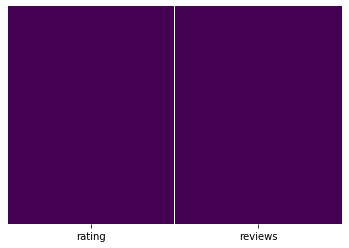

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Visualize the count of rating

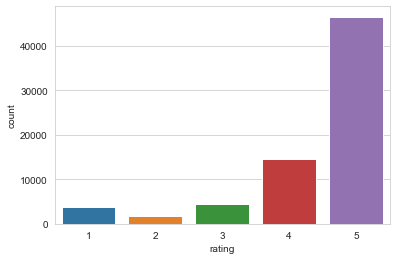

In [8]:
sns.set_style('whitegrid')
sns.countplot(df['rating'])

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,71044.0,4.385747,1.067659,1.0,4.0,5.0,5.0,5.0


# Text Cleaning/Preprocessing

In [10]:
df.reviews = df.reviews.astype(str) 
df.rating = df.rating.astype(int) 
df.reviews = df.reviews.apply(lambda x: x.lower())
df.head()

,rating,reviews
0,5,i love this album. it's very good. more to the...
1,5,good flavor. this review was collected as part...
2,5,good flavor.
3,1,i read through the reviews on here before look...
4,1,my husband bought this gel for us. the gel cau...


In [11]:
#First level of cleaning

import re
import string
def text_clean_1(text):
    #text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
cleaned1 = lambda x: text_clean_1(x)

In [12]:
df['Cleaned_reviews'] = df['reviews'].apply(cleaned1)
df.head(10)

,rating,reviews,Cleaned_reviews
0,5,i love this album. it's very good. more to the...,i love this album its very good more to the hi...
1,5,good flavor. this review was collected as part...,good flavor this review was collected as part ...
2,5,good flavor.,good flavor
3,1,i read through the reviews on here before look...,i read through the reviews on here before look...
4,1,my husband bought this gel for us. the gel cau...,my husband bought this gel for us the gel caus...
5,1,my boyfriend and i bought this to spice things...,my boyfriend and i bought this to spice things...
6,1,bought this earlier today and was excited to c...,bought this earlier today and was excited to c...
7,1,i bought this product for my husband and i to ...,i bought this product for my husband and i to ...
8,1,my husband and i bought this for some extra fu...,my husband and i bought this for some extra fu...
9,1,got as a surprise for my husband there is noth...,got as a surprise for my husband there is noth...


In [13]:
#Second level of cleaning

def text_clean_2(text):
    text = re.sub('[''""..]', '', text)
    text = re.sub('\n', '', text)
    return text
cleaned2 = lambda x: text_clean_2(x)

In [14]:
df['Cleaned_reviews_new'] = df['Cleaned_reviews'].apply(cleaned2)
df.head()


,rating,reviews,Cleaned_reviews,Cleaned_reviews_new
0,5,i love this album. it's very good. more to the...,i love this album its very good more to the hi...,i love this album its very good more to the hi...
1,5,good flavor. this review was collected as part...,good flavor this review was collected as part ...,good flavor this review was collected as part ...
2,5,good flavor.,good flavor,good flavor
3,1,i read through the reviews on here before look...,i read through the reviews on here before look...,i read through the reviews on here before look...
4,1,my husband bought this gel for us. the gel cau...,my husband bought this gel for us the gel caus...,my husband bought this gel for us the gel caus...


# Train Test split

In [15]:
# Split the dataset into features data and target data

y = df.rating
X = df.Cleaned_reviews_new

In [16]:
#Split the dataset again, into 80% training dataset and 20% twsting dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)

In [17]:
print('X_train :', (len(X_train)))
print('X_test :', (len(X_test)))
print('y_train :', (len(y_train)))
print('y_test :', (len(y_test)))

X_train : 56835
X_test : 14209
y_train : 56835
y_test : 14209


In [18]:
#len(X_train)

In [19]:
#print(X_train)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid_fVectorizer = TfidfVectorizer()

from sklearn.linear_model import LogisticRegression

Logistic_Regression = LogisticRegression(solver = "lbfgs")


In [45]:
from sklearn.pipeline import Pipeline

P = Pipeline([('vectorizer',Tfid_fVectorizer),('classifier',Logistic_Regression)])
P.fit(X_train,y_train)

Prediction = P.predict(X_test)

#Pfit.(self, X, y, **fit_params)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Prediction, y_test)

array([[ 478,   98,   56,   36,   30],
       [  19,   31,   13,    6,    7],
       [  27,   54,  168,   90,   38],
       [  33,   52,  307,  702,  450],
       [ 163,  117,  359, 2082, 8793]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score = accuracy_score(y_test, Prediction)
precision_score = precision_score(y_test, Prediction, average='weighted')
recall_score = recall_score(y_test, Prediction, average='weighted')

print("Model Accuracy on test dataset: ", accuracy_score)
print("Model precision on test dataset: ", precision_score)
print("Model recall on test dataset: ", recall_score)

Model Accuracy on test dataset:  0.7158842986839328
Model precision on test dataset:  0.6672391844983312
Model recall on test dataset:  0.7158842986839328


# Check for real world input

In [48]:
example = ['This website is fault']
result = P.predict(example)
print(result)

[4]


# Implementing the Naive Bayes model 

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid_fVectorizer = TfidfVectorizer()

from sklearn.naive_bayes import MultinomialNB
Multi_nomialNB = MultinomialNB()


In [57]:
from sklearn.pipeline import Pipeline

P = Pipeline([('vectorizer',Tfid_fVectorizer),('classifier', Multi_nomialNB)])
P.fit(X_train,y_train)

Predictions = P.predict(X_test)

#Pfit.(self, X, y, **fit_params)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Predictions, y_test)

array([[  39,    3,    0,    0,    1],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    3],
       [   0,    3,   33,   38,   31],
       [ 681,  346,  870, 2877, 9283]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score = accuracy_score(y_test, Predictions)
precision_score = precision_score(y_test, Predictions, average='weighted')
recall_score = recall_score(y_test, Predictions, average='weighted')

print("Model Accuracy on test dataset: ", accuracy_score)
print("Model precision on test dataset: ", precision_score)
print("Model recall on test dataset: ", recall_score)

Model Accuracy on test dataset:  0.6587374199451053
Model precision on test dataset:  0.5532960655966884
Model recall on test dataset:  0.6587374199451053


# Check for real world input

In [62]:
example = ['This website is fault']
result = P.predict(example)
print(result)

[5]
